**Dimensional_Reduction**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('car_price_preprocessed.csv')
print(df.columns.tolist())


['car_ID', 'symboling', 'CarName', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'CarBrand_alfa-romero', 'CarBrand_audi', 'CarBrand_bmw', 'CarBrand_buick', 'CarBrand_chevrolet', 'CarBrand_dodge', 'CarBrand_honda', 'CarBrand_isuzu', 'CarBrand_jaguar', 'CarBrand_mazda', 'CarBrand_mercury', 'CarBrand_mitsubishi', 'CarBrand_nissan', 'CarBrand_peugeot', 'CarBrand_plymouth', 'CarBrand_porcshce', 'CarBrand_porsche', 'CarBrand_renault', 'CarBrand_saab', 'CarBrand_subaru', 'CarBrand_toyota', 'CarBrand_toyouta', 'CarBrand_volkswagen', 'CarBrand_volvo', 'CarBrand_vw', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'doornumber_four', 'doornumber_two', 'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front', 'enginelocation_

**PCA**

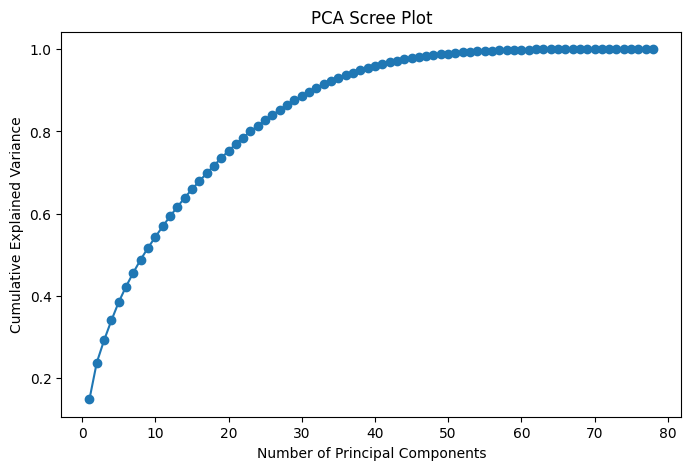

In [4]:
features = [col for col in df.columns if col not in ["car_ID", "CarName"]]
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 完整 PCA，用于碎石图
pca_full = PCA()
pca_full.fit(X_scaled)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)


plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cum_var) + 1), cum_var, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.show()

In [6]:
pca = PCA(n_components=0.90, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print(f"Number of principal components retained: {X_pca.shape[1]}")

pc_columns = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pc_columns)
df_pca.to_csv("PCA/car_price_pca.csv", index=False)
print("Saved PCA results to PCA/car_price_pca.csv")

Number of principal components retained: 32
Saved PCA results to PCA/car_price_pca.csv


**AE**

**SAE**